Ниже представлен датасет Abba Music Characteristics (Spotify) с сайта https://www.kaggle.com/datasets/thedevastator/abba-music-characteristics-spotify?resource=download. В данном датасете представлена информация насчет самых популярных песен (хитов) шведской группы ABBA на известной платформе Spotify. Все данные реальны. Большая часть данных - числовые значения, которые в дальнейшем будут использованы в ходе работы.

Датасет включает в се6я следующие атрибуты:

album - название альбома (String) 
track_number - трек-номер песни в альбоме (Integer) 
uri - уникальный идентификатор песни (String) 
acousticness - мера акустики песни (Float) 
danceability - насколько хорошо песня хороша для танцев (Float) 
energy - энергичность песни (Float) 
instrumentalness - инструментальность песни (Float) 
liveness - оригинальность песни (Float) 
loudness - громкость песни (Float) 
speechiness - мера кол-ва текста в песни (Float) 
tempo - темп песни (Float) 
valence - позитивность песни (Float) 
popularity - популярность песни (Integer) 
artist - исполнитель песни (String)

In [3]:
import numpy as np       #импортируем нужные библиотеки
import pandas as pan
from sklearn.cluster import KMeans

import matplotlib.pyplot as plot

db = pan.read_csv('ABBA_Hits_spotify.csv')     #подключаем наш датасет
db.head()

,index,Unnamed: 0,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,0,0,Live At Wembley Arena,1,1mKnzPuoEhyGP1dgMvOzfT,Gammal fäbodpsalm - Live,spotify:track:1mKnzPuoEhyGP1dgMvOzfT,0.86200,0.205,0.176,0.908000,0.407,-24.421,0.0457,96.066,0.128,50,Abba
1,1,1,Live At Wembley Arena,2,6YPvn6me5k5OiXVPtgmeak,Voulez-Vous - Live,spotify:track:6YPvn6me5k5OiXVPtgmeak,0.00459,0.500,0.707,0.002830,0.501,-11.825,0.0413,137.314,0.530,41,Abba
2,2,2,Live At Wembley Arena,3,3GcRxtoMaxXe4zjvRLzZlr,If It Wasn't For The Nights - Live,spotify:track:3GcRxtoMaxXe4zjvRLzZlr,0.00194,0.496,0.778,0.000050,0.978,-13.305,0.1060,104.645,0.372,39,Abba
3,3,3,Live At Wembley Arena,4,4juV8pzyyD53BeWJzCanQb,As Good As New - Live,spotify:track:4juV8pzyyD53BeWJzCanQb,0.03050,0.408,0.727,0.000000,0.777,-11.898,0.0556,148.697,0.662,37,Abba
4,4,4,Live At Wembley Arena,5,5wTlYf7V2ser4UslPKxIKU,"Knowing Me, Knowing You - Live",spotify:track:5wTlYf7V2ser4UslPKxIKU,0.01030,0.389,0.775,0.000033,0.743,-10.317,0.0364,99.042,0.490,39,Abba


Добавим новый атрибут: мелодичность песни. Этот атрибут будет показывать, насколько мелодична песня, исходя из ее инструментальности и акустичности. Мелодичность = Инструментальность + Акустичность:

In [5]:
db['melodicity'] = db['instrumentalness'] + db['acousticness']

По результатам 1-й лабораторной работы дубликатов в датасете нет, как и пропущенных значений, и выбросов.

Построим графики зависимостей одной переменной от другой:

Зависимость танцевальности песен от энергичности: 
Матрица корреляции:  [[1.         0.12536678]
 [0.12536678 1.        ]]




Зависимость акустики песен от инструментальности: 
Матрица корреляции:  [[ 1.         -0.11942623]
 [-0.11942623  1.        ]]




Зависимость популярности песен от оригинальности: 
Матрица корреляции:  [[1.         0.02708033]
 [0.02708033 1.        ]]




Зависимость позитивности песен от темпа: 
Матрица корреляции:  [[1.         0.05041509]
 [0.05041509 1.        ]]




Зависимость громкости песен от кол-ва текста: 
Матрица корреляции:  [[1.         0.02956279]
 [0.02956279 1.        ]]




Зависимость мелодичности песен от инструментальности: 
Матрица корреляции:  [[1.         0.02956279]
 [0.02956279 1.        ]]






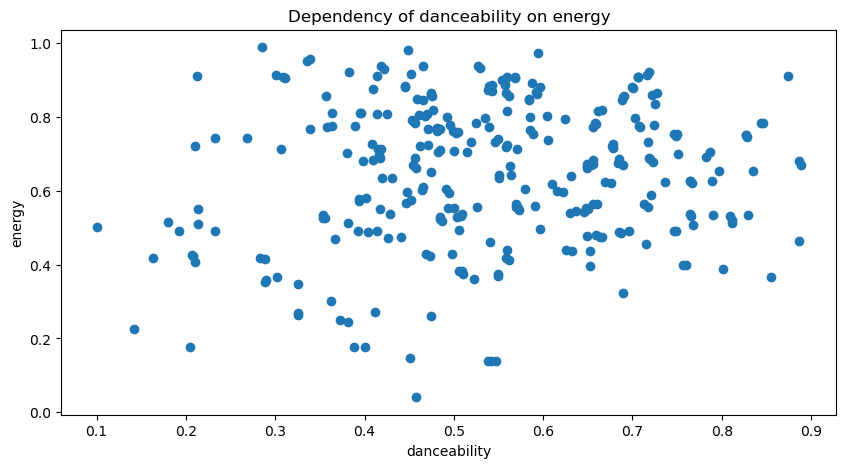

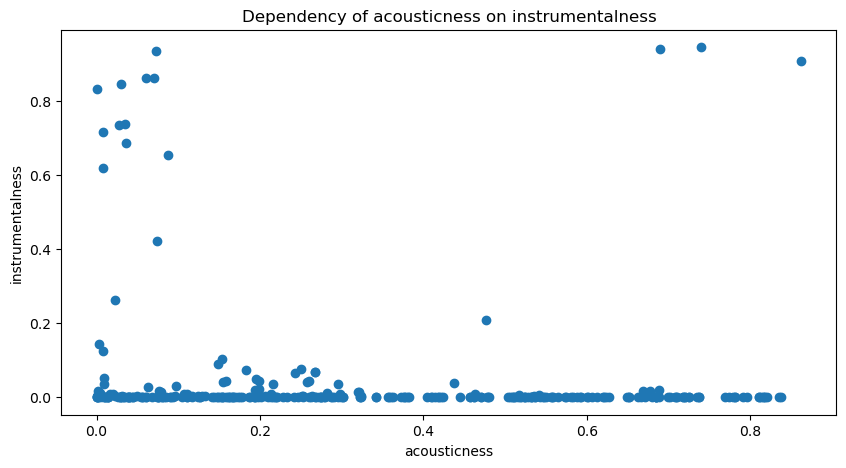

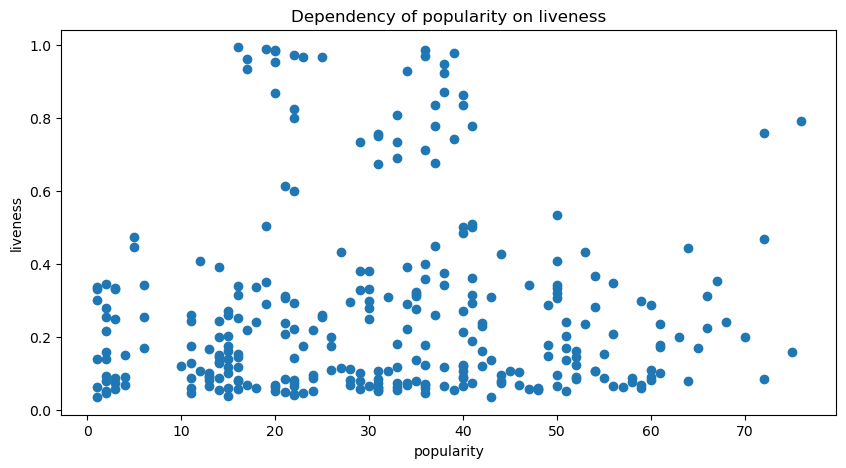

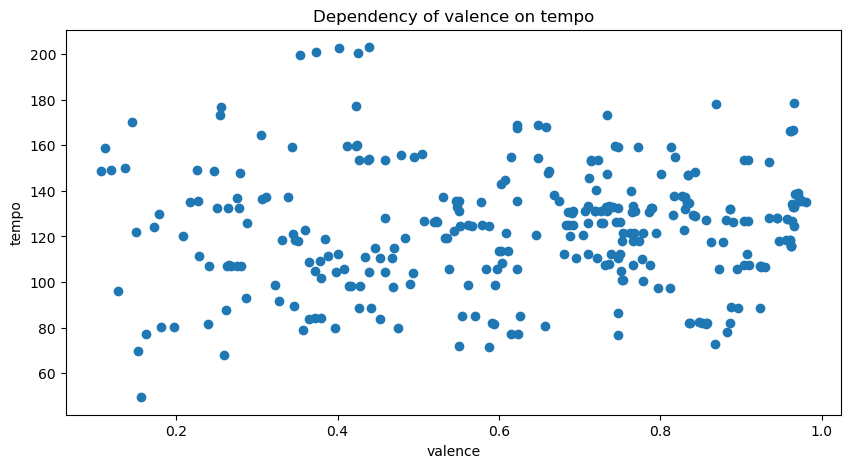

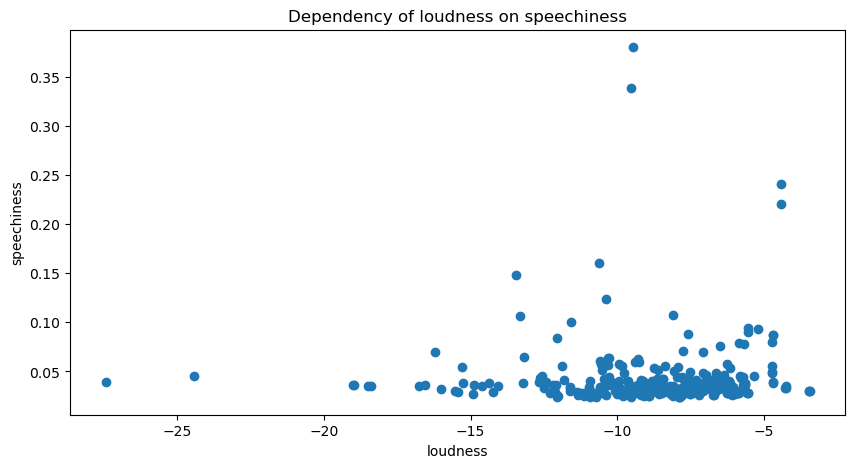

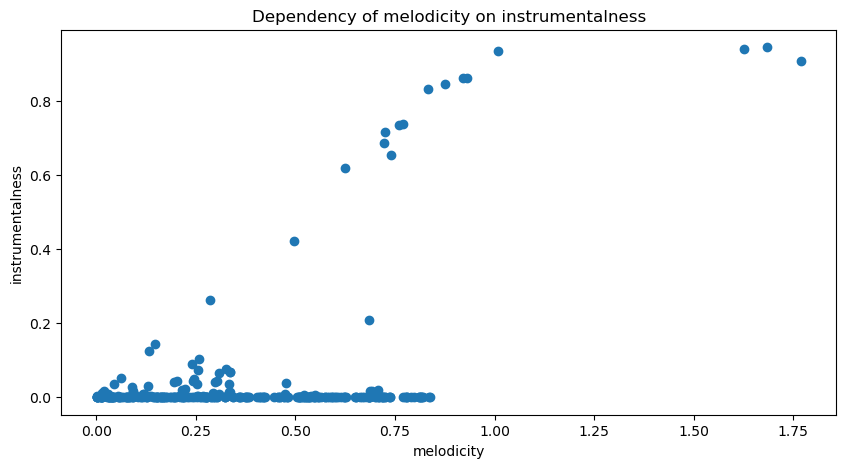

In [8]:
def Dispersion(data_1, data_2):    #функция для отрисовки графика рассеивания
    plot.figure(figsize=(10, 5));
    plot.scatter(db[data_1], db[data_2])
    plot.xlabel(data_1)
    plot.ylabel(data_2)
    plot.title('Dependency of ' + data_1 + ' on ' + data_2)


print('Зависимость танцевальности песен от энергичности: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['danceability']), np.array(db['energy'])))
print('\n\n\n')
Dispersion('danceability', 'energy')


print('Зависимость акустики песен от инструментальности: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['acousticness']), np.array(db['instrumentalness'])))
print('\n\n\n')
Dispersion('acousticness', 'instrumentalness')


print('Зависимость популярности песен от оригинальности: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['popularity']), np.array(db['liveness'])))
print('\n\n\n')
Dispersion('popularity', 'liveness')


print('Зависимость позитивности песен от темпа: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['valence']), np.array(db['tempo'])))
print('\n\n\n')
Dispersion('valence', 'tempo')


print('Зависимость громкости песен от кол-ва текста: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['loudness']), np.array(db['speechiness'])))
print('\n\n\n')
Dispersion('loudness', 'speechiness')


print('Зависимость мелодичности песен от инструментальности: ')
print('Матрица корреляции: ', np.corrcoef(np.array(db['loudness']), np.array(db['speechiness'])))
print('\n\n\n')
Dispersion('melodicity', 'instrumentalness')

Сделаем кластеризацию:

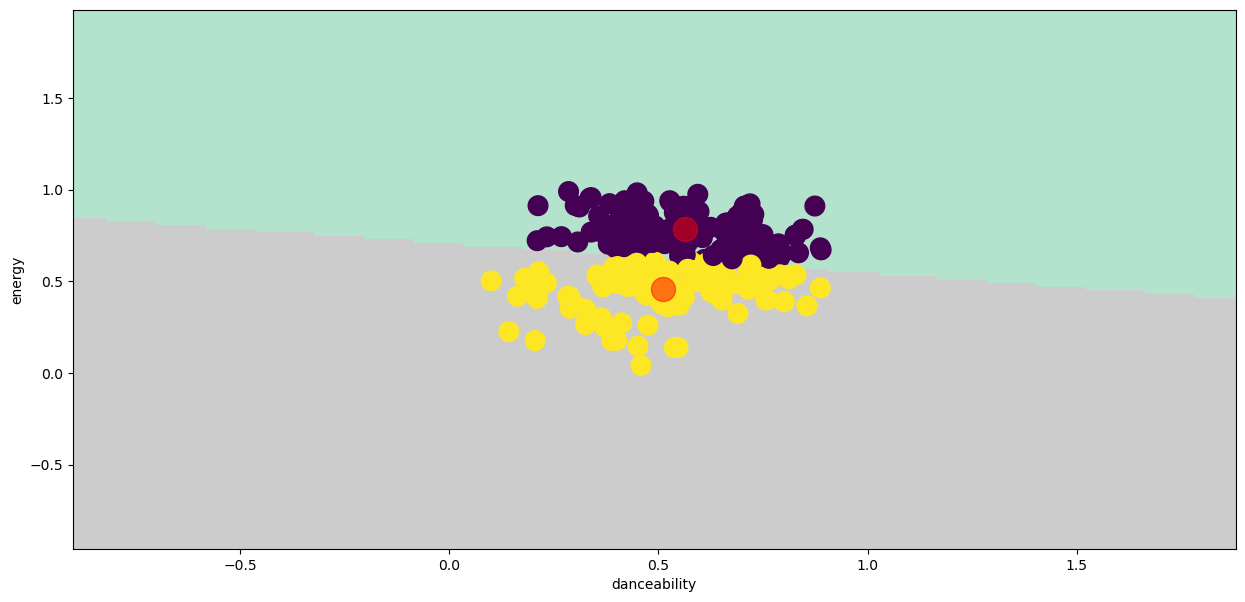

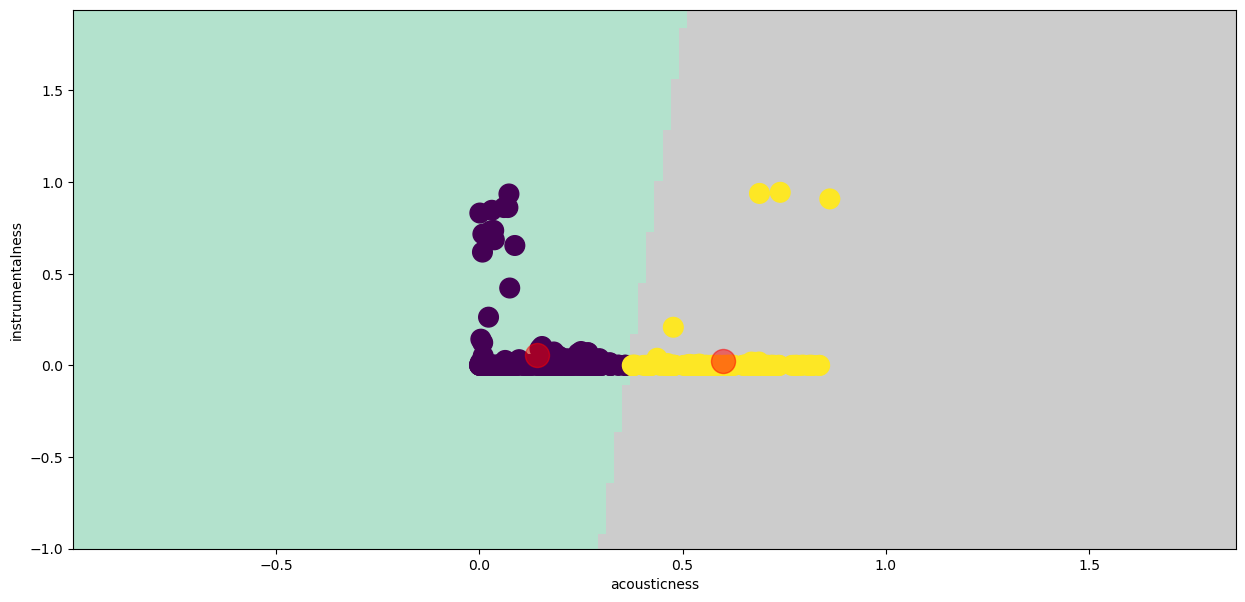

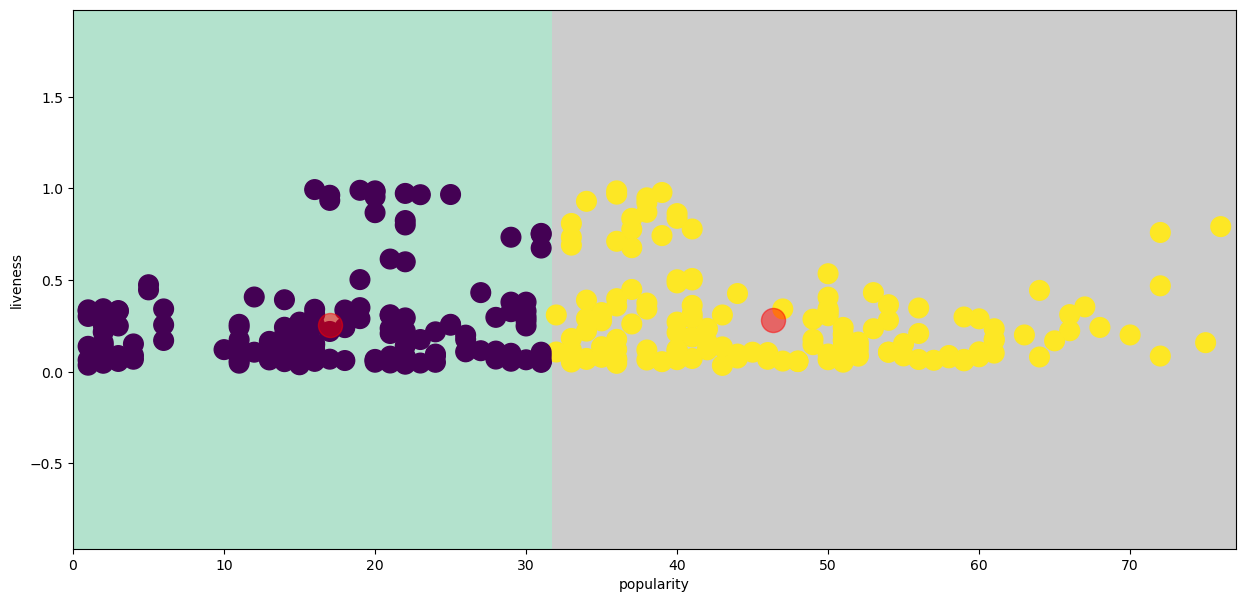

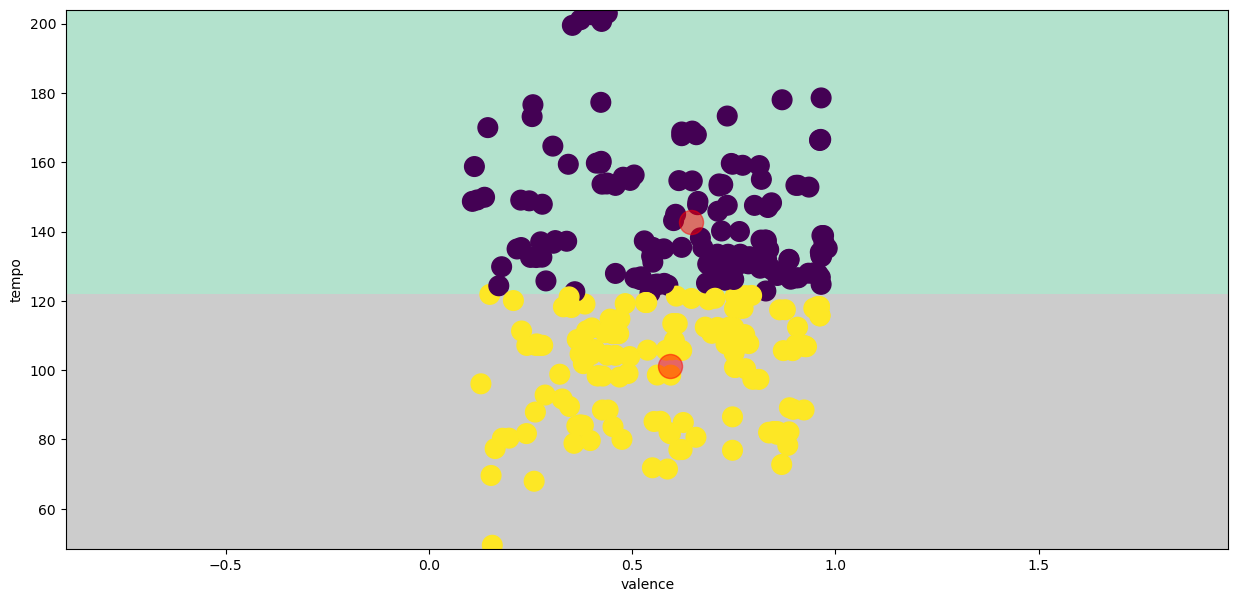

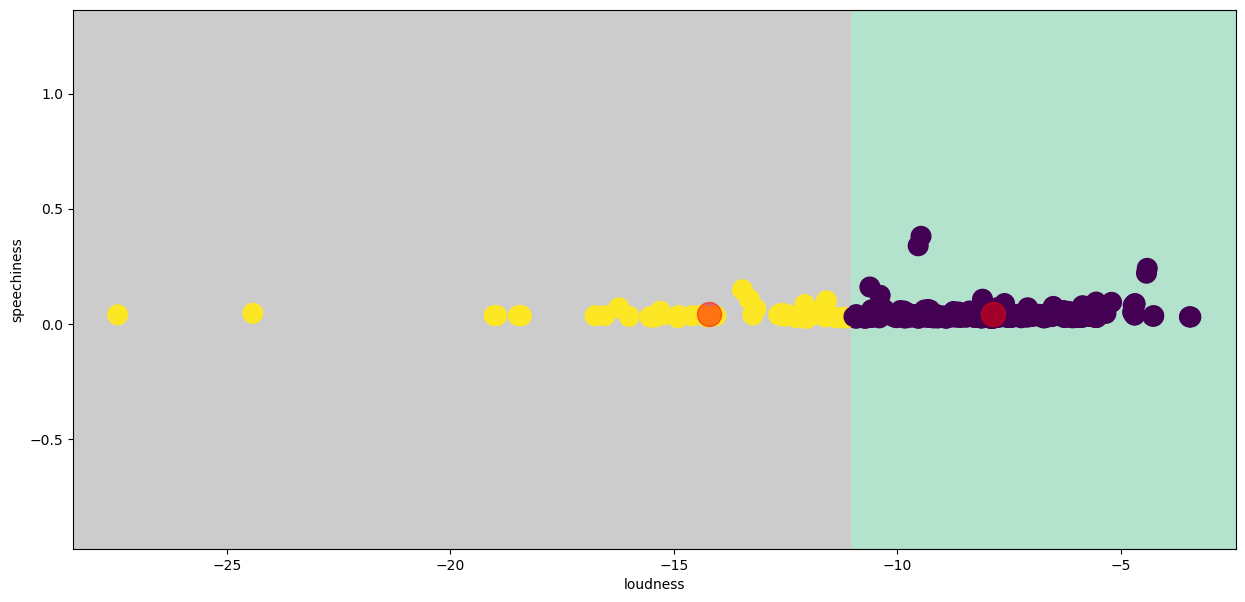

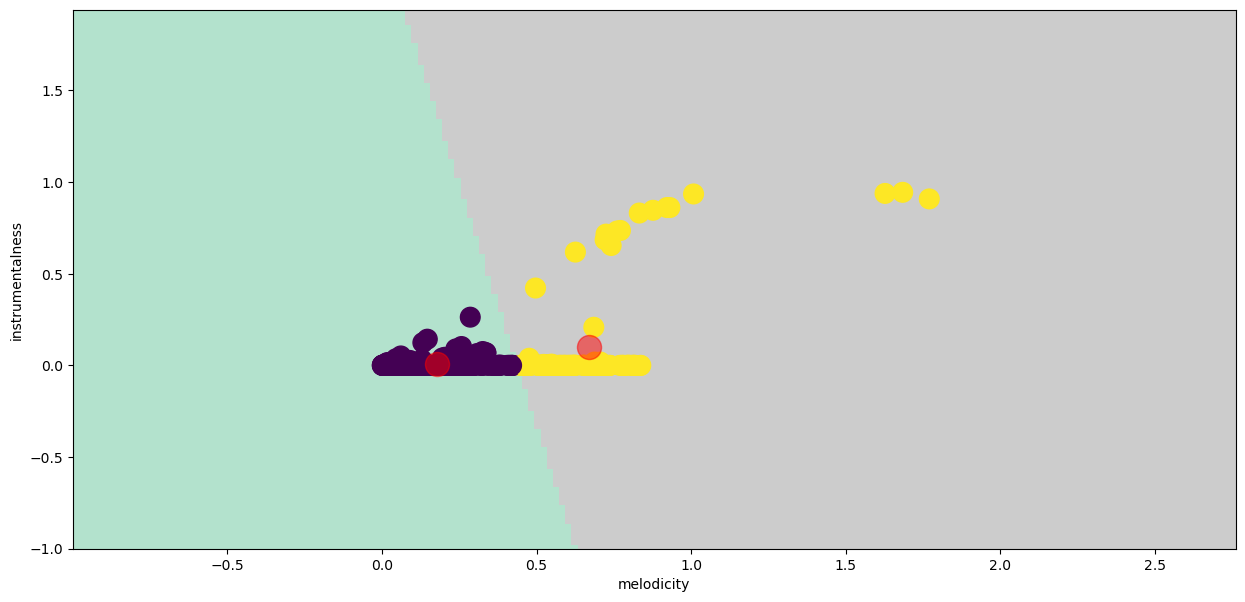

In [10]:
def Clustering(data1, data2):    #функция для отрисовки кластеризации
    X = db[[data1, data2]].iloc[: , :].values
    algorithm = (KMeans(n_clusters = 2, init='k-means++', n_init = 10, max_iter=300, tol=0.0001,  random_state= 111, algorithm='elkan') )
    algorithm.fit(X)
    labels5 = algorithm.labels_
    centroids5 = algorithm.cluster_centers_
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
     
    plot.figure(1, figsize = (15, 7))
    plot.clf()
    Z = Z.reshape(xx.shape)
    plot.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap = plot.cm.Pastel2, aspect = 'auto', origin='lower')
    
    plot.scatter(x = data1, y = data2, data = db, c = labels5, s = 200 )
    plot.scatter(x = centroids5[:, 0], y = centroids5[:, 1], s = 300, c = 'red', alpha = 0.5)
    plot.xlabel(data1)
    plot.ylabel(data2)
    plot.show()

Clustering('danceability', 'energy')
Clustering('acousticness', 'instrumentalness')
Clustering('popularity', 'liveness')
Clustering('valence', 'tempo')
Clustering('loudness', 'speechiness')
Clustering('melodicity', 'instrumentalness')

Выводы: 

В данной лабораторной работе мы удалили все выбросы, дубликаты, а также пропущенные значения в каждом атрибуте.
Также были построены графики зависимостей одной переменной от другой. Был изучен метод кластеризации KMeans, с помощью которого на графиках мы смогли выделить основные кластеры и описать их.